# Assignment 1

## 1. Watts-Strogatz Networks

__Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.__

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import numpy as np
import random as rm

#Create the 3 networks and find the average shortest path
ws1 = nx.watts_strogatz_graph(500,4,0)
ws2 = nx.watts_strogatz_graph(500,4,0.1)
ws3 = nx.watts_strogatz_graph(500,4,1)
len1 = nx.average_shortest_path_length(ws1)
len2 = nx.average_shortest_path_length(ws2)
len3 = nx.average_shortest_path_length(ws3)
print("length 1:",len1)
print("length 2:",len2)
print("length 3:",len3)

#p dropoff curve:
pvals = []
pcurve = []
pval = 0
for i in range(0,10):
    ws = nx.watts_strogatz_graph(500,4,pval)
    len1 = nx.average_shortest_path_length(ws)
    pcurve.append(len1)
    pvals.append(pval)
    pval = pval + 0.1

length 1: 62.875751503006015
length 2: 7.9019799599198395
length 3: 4.739951903807615


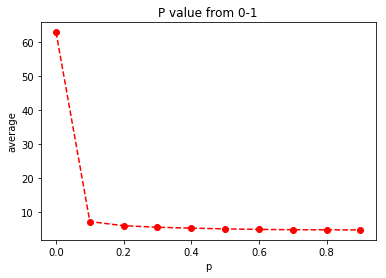

In [2]:
plt.plot(pvals,pcurve,'--ro')
plt.title("P value from 0-1")
plt.xlabel('p')
plt.ylabel('average')
plt.show()
plt.ion()

When p is 1, the network is a complete graph and all nodes belong to a single component. It can be seen from the above figure that a quite low p results in few shortcuts that drops the value to close to a fully random network very quickly.

__Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).__

[62.87575150300606, 24.233339478957916, 13.023577875751503, 10.092211462925851, 7.743278877755513, 6.109161202404809]
[7.105427357601002e-15, 4.498275948682626, 1.1752313498241858, 0.5535148663865612, 0.34610751278044855, 0.12014328424789326]


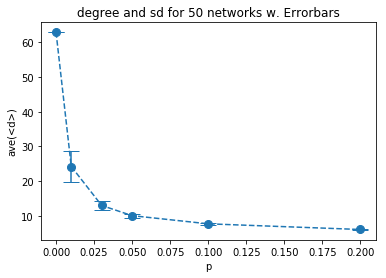

In [3]:
#for each pvalue create 50 networks of 500 nodes
pvalues = [0,0.01,0.03,0.05,0.1,0.2]
networks = []
d = []
sd = []
for i in range(0,6):
    p = pvalues[i];
    for j in range(0,50):
        n = nx.watts_strogatz_graph(500,4,p)
        networks.append(n)
        d.append(nx.average_shortest_path_length(n))
        sd.append(np.power(p*(1-p)*500,0.5))

# Find averages and standard deviation
avgd = []
avgsd = []
for i in range(0,6):
    avg = 0
    avgs = []
    for j in range(0,50):
        avg = avg + d[i*50+j]
        avgs.append(d[i*50+j])
    avgd.append(avg/50)
    avgsd.append(np.std(avgs))
print(avgd)        
print(avgsd)  

#Create plot
plt.figure()
plt.errorbar(pvalues, avgd, yerr=avgsd,xerr=None,fmt='--o', markersize=8, capsize=8)
plt.title("degree and sd for 50 networks w. Errorbars")
plt.xlabel('p')
plt.ylabel('ave(<d>)')
plt.show()

Average degrees and standard deviations of the 50 generated networks of 500 nodes per p value.

## 2. The Barabasi-Albert Model
__Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.__

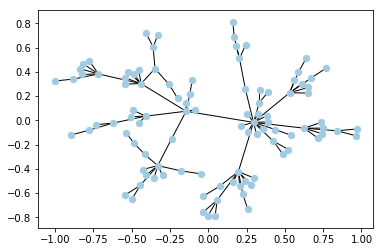

In [4]:
#create the network using a new BA model
ban = nx.Graph()
maxNode = 100
p = []
if not ban.nodes():
    ban.add_node(1)
    p.append(1)
if not ban.edges() == False:
    for edge in ban.edges():
        nodeA, nodeB = edge
        p.extend([nodeA,nodeB])
for i in range(len(ban.nodes())+1, maxNode+1):
    connect = rm.choice(p)
    p.extend([connect,i])
    ban.add_edge(connect, i)
    

nx.draw_networkx(ban,with_labels=False, front_weight='bold',node_size=40,node_color='#A0CBE2')
plt.show()

Network representation of the BA model network

__Now create a 5000 node network.__

- __What's the maximum and minimum degree?__
- __Now, bin the degree distribution, for example using numpy.histogram.__
- __Plot the distribution. Plot it with both linear and log-log axes.__

min = 1
max = 112


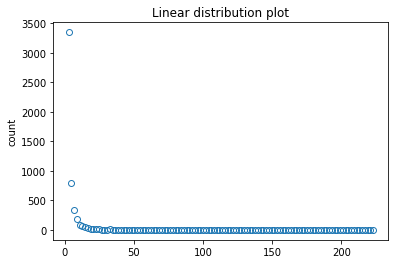

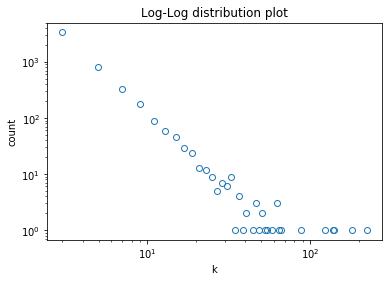

In [5]:
#create the network using a new BA model but with 5000 nodes
bag = nx.Graph()
maxNode = 5000
p = []
if not bag.nodes():
    bag.add_node(1)
    p.append(1)
if not bag.edges() == False:
    for edge in bag.edges():
        nodeA, nodeB = edge
        p.extend([nodeA,nodeB])
for i in range(len(bag.nodes())+1, maxNode+1):
    connect = rm.choice(p)
    p.extend([connect,i])
    bag.add_edge(connect, i)

#Find and print min/max
maxd = max([int(j) for i,j in bag.degree()])
mind = min([int(j) for i,j in bag.degree()])
print("min =",mind)
print("max =",maxd)

#Generate linear plot
degreeslist = [int(j) for i,j in bag.degree()]
hist, binList = np.histogram(degreeslist, maxd)
plt.plot((binList[1:]+binList[:-1]),hist, 'o', mfc='none')
plt.title("Linear distribution plot")
plt.ylabel('count')
plt.show()
#Generate log-log plot
plt.loglog((binList[1:]+binList[:-1]),hist, 'o', mfc='none')
plt.title("Log-Log distribution plot")
plt.xlabel('k')
plt.ylabel('count')
plt.show()

Linear distribution and log-log plot of BA network consisting of 5000 nodes

## 3. Power-laws and the friendship paradox
__Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:__

- __Pick a node i at random (e.g. use random.choice). Find its degree.__
- __Find i's neighbors. And calculate their average degree.__
- __Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.__
- __Do this 1000 times. How many out of those 1000 times is the friendship paradox true?__

In [6]:
#pick a node i at random (e.g. use random.choice). Find its degree.
i = rm.choice(list(bag.nodes()))
idegree = bag.degree(i)
print("I's degree: ",idegree)

I's degree:  1


In [7]:
#Find i's neighbors. And calculate their average degree.
i_neighbors = list(bag.neighbors(i))
print ("i's neighbors: ", i_neighbors)
d = 0
for n in i_neighbors:
    d = d + bag.degree(n)
aveNeiD = d /len(i_neighbors)

print ("neighbor's average degrees =", aveNeiD)

i's neighbors:  [170]
neighbor's average degrees = 6.0


In [8]:
#Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.
tf = aveNeiD > idegree
print ("It is %s that the friendship paradox holds in this case" % tf)

It is True that the friendship paradox holds in this case


In [9]:
#Find 1000 random notes, check if the degree of its neighbors are bigger than its own degrees
isTrue = 0
for i in range(1000):
    node = rm.choice(list(bag.nodes()))
    nodeDeg = bag.degree(node)
    nodeNei = list(bag.neighbors(node))
    
    deg = 0
    for n in nodeNei:
        deg = deg + bag.degree(n)
    degree_neighbor = deg /len(nodeNei)
    if degree_neighbor > nodeDeg:
        isTrue = isTrue + 1

#display the number of times the paradox holds true
print ("The friendship paradox is true %s times out of 1000 " % isTrue)

The friendship paradox is true 871 times out of 1000 


## 4. Basic stats for pages over time
__Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).__

- __By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.__

444
442
445


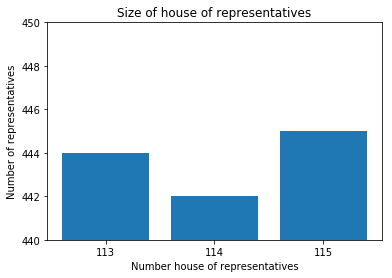

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import csv's
h113 = pd.read_csv('H113.csv')
h113['congress_number'] = 113
h114 = pd.read_csv('H114.csv')
h114['congress_number'] = 114
h115 = pd.read_csv('H115.csv')
h115['congress_number'] = 115
#print lengths
print(len(h113))
print(len(h114))
print(len(h115))

#plot result
plt.bar(["113","114","115"], [len(h113),len(h114),len(h115)], align='center', alpha=1)
plt.title('Size of house of representatives')
plt.ylim(440,450)
plt.xlabel('Number house of representatives')
plt.ylabel('Number of representatives')
plt.show()

all_members = pd.concat([h113,h114,h115]).reset_index(drop=True)

The development is unexpected as usually according to wiki, the number of members is set to 435. However if one considers members dropping out for other reasons during their terms, illness, scandals and replacements coming in it makes sense.

- __How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.__

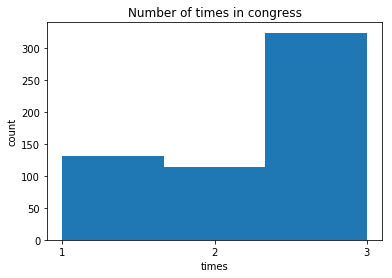

In [11]:
#create histogram plot
groups = all_members.groupby("WikiPageName")
times_in_congress = groups.size().sort_values()
result = times_in_congress.groupby(times_in_congress).size()
plt.hist(times_in_congress,bins=3)
plt.xticks([1,2,3])
plt.title("Number of times in congress")
plt.xlabel('times')
plt.ylabel('count')
plt.show()

The above figure shows that a significant amount of representatives are present in either 2 or 3 of the congresse
- __Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.__

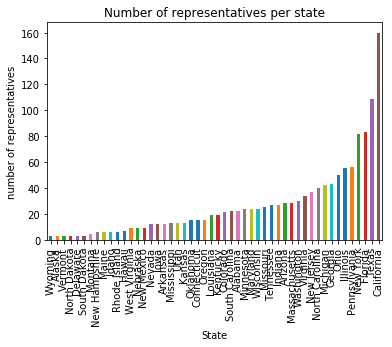

In [12]:
# Show plot of representatives distribution
groupbyState = all_members.groupby("State")
members_per_state = groupbyState.size().sort_values()
members_per_state.plot('bar')
plt.title("Number of representatives per state")
plt.xlabel('State')
plt.ylabel('number of representatives')
plt.show()

The different states number of representatives can be seen in the above figure, showing California has the largest number 
- __How has the party composition of the house of representative changed over time? Plot your results.__

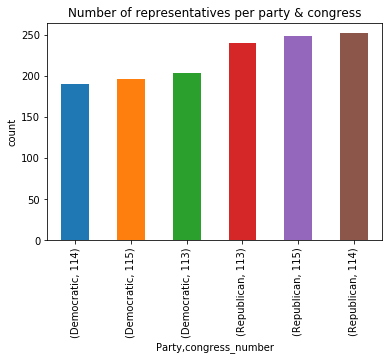

In [13]:
# show plot of party & congress counts
GroupByNUmberAndParty = all_members.groupby(['Party','congress_number'])
sortedstate = GroupByNUmberAndParty.size().sort_values()
sortedstate.plot('bar')
plt.title("Number of representatives per party & congress")
plt.ylabel('count')
plt.show()

As can be seen from the above figure, the house of representatives has been dominated by the republicans during the 113th,114th and 115th congresses.

## 5. Basic stats for the network
__Create simple network statistics for the 113th house of representatives.__

- __What is the number of nodes in the network? And the number of links?__

In [14]:
import urllib.request   
import urllib.parse
import io
import re   

#Generate all notes for this network
nodes = h113['WikiPageName'].tolist()
for i in range(0,len(h113)-1):
    nodes[i] =  re.findall(r'[\w|\.]+\_[\w|\.]+[\_]?[\(]?[\w]*[\)]?',nodes[i])[0]

# go through all texts and find links relevant 
linklist = []
for i in range(0,len(h113)): 
    first_node=h113.WikiPageName.sort_values().iloc[i]
    path_folder='h113/'
    f=io.open(path_folder+first_node+'.txt','r',encoding='utf-8').read()
    links = re.findall("\[\[(.*?)\]\]",f)
    sortedLinks = []
    for j in range(0,len(links)):
        processedName = re.findall(r'[\w|\.]+\s[\w|\.]+[\s]?[\(]?[\w|\_]+[\)]?',links[j])
        processedSource = re.findall(r'[\w|\.]+\_[\w|\.]+[\_]?[\(]?[\w]*[\)]?',first_node)[0]
        
        if len(processedName) > 0:
            processedName[0] = processedName[0].replace(" ","_")
            if processedName[0] in nodes:
                sortedLinks.append((processedSource,processedName[0]))
    
    linklist.extend(sortedLinks)

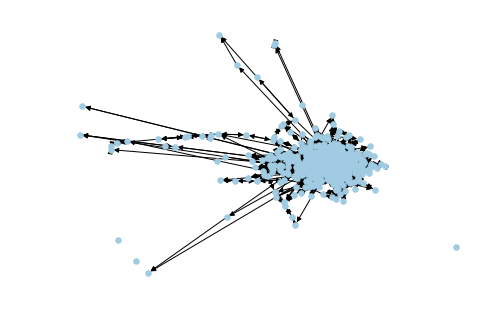

In [15]:
#plot the found network
from networkx.algorithms import bipartite
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(linklist)
nx.draw(G, with_labels=False, front_weight='bold',node_size=30,node_color='#A0CBE2')
plt.show()

Above is a network representation of the network generated from looking through all pages and extracting the links

In [16]:
#Finally print the number of nodes and edges
print(G.number_of_nodes())
print(G.number_of_edges())

444
1488


The number of nodes: 444 and 1488 links

- __Plot the in and out-degree distributions.__

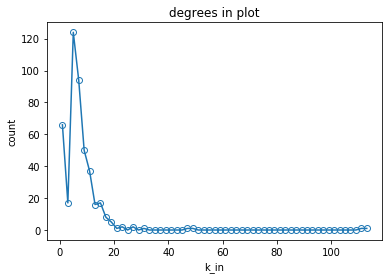

In [17]:
# get lists and cast ints 
out_degree = G.out_degree()
in_degree = G.in_degree()
out_degree = max([int(j) for i,j in out_degree])
in_degree = max([int(j) for i,j in in_degree])

#plot degrees in
hist, binList = np.histogram([int(j) for i,j in G.in_degree()], in_degree)
plt.plot((binList[1:]+binList[:-1]),hist, '-o', mfc='none')
plt.title('degrees in plot')
plt.xlabel('k_in')
plt.ylabel('count')
plt.show()

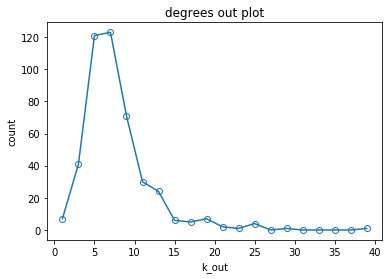

In [18]:
#plot degrees out
hist, binList = np.histogram([int(j) for i,j in G.out_degree()], out_degree)
plt.plot((binList[1:]+binList[:-1]),hist, '-o', mfc='none')
plt.title('degrees out plot')
plt.xlabel('k_out')
plt.ylabel('count')
plt.show()

- __Who is the most connected representative?__

In [19]:
# Find the person with the biggest number of connections (in & out)
out_degree = G.out_degree()
in_degree = G.in_degree()

maxv = (0,0)
for i,j in out_degree:
    if(maxv[1] < int(j) + int(G.in_degree(i))):
        maxv = (i,j+ int(G.in_degree(i)))
print(maxv)

('Nancy_Pelosi', 67)


Therefore ('Nancy_Pelosi', 67) is the most connected.